In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Loading Iris Dataset

In [4]:
iris = load_iris()
X, y = iris.data, iris.target

# Preprocessing and Visualization

## 1. Visualize the dataset using scatterplots to explore the relationships between the features.

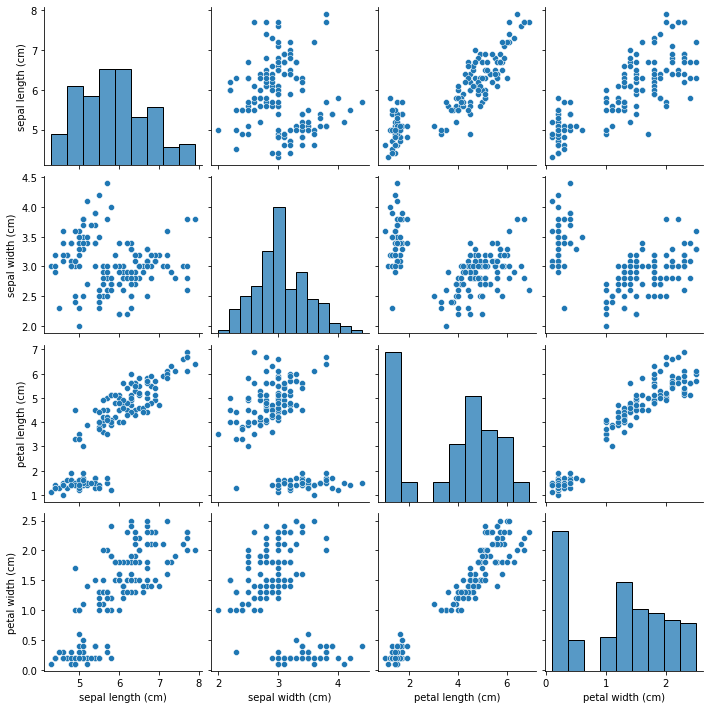

In [6]:
sns.pairplot(pd.DataFrame(X, columns=iris.feature_names))
plt.show()

## 2. Preprocessing 
### - scaling features
### - splitting Data into training and testing sets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Visualize the standardized features to identify any outliers.

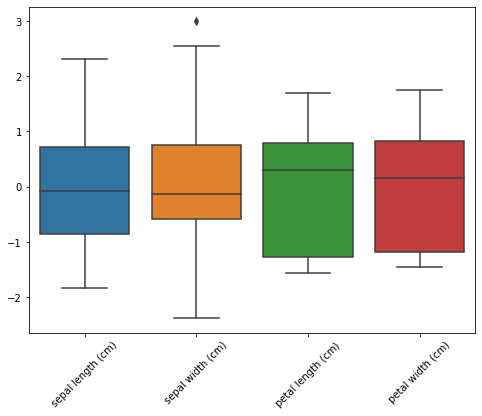

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(data=X_train)
plt.xticks(np.arange(4), iris.feature_names, rotation=45)
plt.show()

## 4. Removing any outliers

In [10]:
outlier_indexes = ((X_train > 3) | (X_train < -3)).any(axis=1)
X_train = X_train[~outlier_indexes]
y_train = y_train[~outlier_indexes]

## 5. Visualize the class distributions using a bar plot

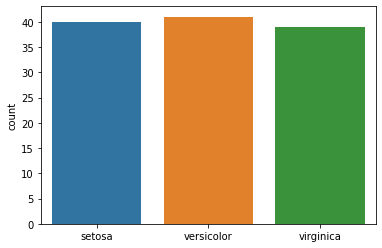

In [12]:
sns.countplot(x=y_train)
plt.xticks(np.arange(3), iris.target_names)
plt.show()

# Model Training and Testing

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Training the KNN classifier and perform grid search for hyperparameter tuning.

In [19]:
params = {
    'n_neighbors': np.arange(1, 15), 
    'weights': ['uniform', 'distance']
}

In [20]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, cv=5)

In [21]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']})

## Evaluate the performance of the KNN classifier on the test set.

In [29]:
from sklearn.metrics import classification_report

In [30]:
print("Best estimator:", grid.best_estimator_)

Best estimator: KNeighborsClassifier(n_neighbors=9, weights='distance')


In [26]:
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {acc:.2f}')

Test accuracy: 1.00


In [31]:
y_pred = grid.predict(X_test)
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

